<a href="https://colab.research.google.com/github/SwatiBGupta1110/ML_TreeAlgorithms/blob/main/DecisionTree/Car_Condition_Evaluation_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#!pip install category_encoders

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples.

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

**Attribute Information:**

**Class Values:**

unacc, acc, good, vgood

**Attributes:**

**buying:** vhigh, high, med, low.
**maint:** vhigh, high, med, low.
**doors:** 2, 3, 4, 5more.
**persons:** 2, 4, more.
**lug_boot:** small, med, big.
**safety:** low, med, high.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv("/content/sample_data/car_evaluation.csv",names=["buying_price","maintenance_cost","number_of_doors","number_of_persons","lug_boot","safety","decision"])

In [16]:
data.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_cost   1728 non-null   object
 2   number_of_doors    1728 non-null   object
 3   number_of_persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
data.describe()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,4,big,low,unacc
freq,432,432,432,576,576,576,1210


Exploratory Data Analysis

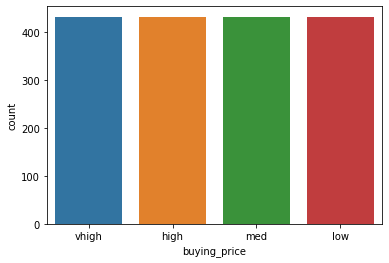

In [23]:
sns.countplot(x="buying_price",data=data)

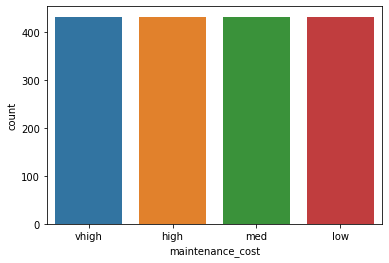

In [28]:
sns.countplot(x="maintenance_cost",data=data)

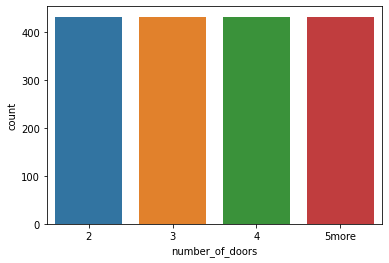

In [29]:
sns.countplot(x="number_of_doors",data=data)

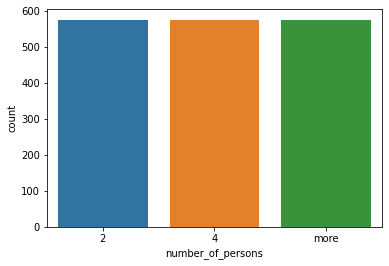

In [30]:
sns.countplot(x="number_of_persons",data=data)

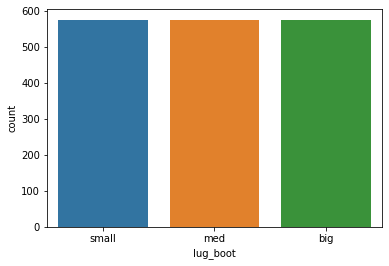

In [31]:
sns.countplot(x="lug_boot",data=data)

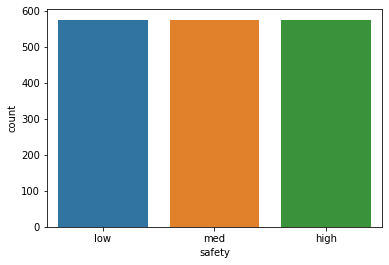

In [32]:
sns.countplot(x="safety",data=data)

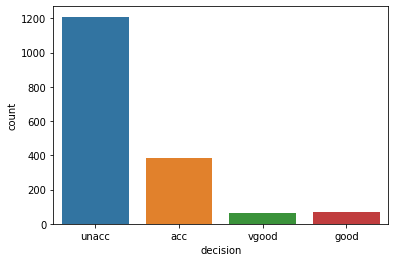

In [33]:
sns.countplot(x="decision",data=data)
# As the target column Decision is highly Imbalanced.

In [35]:
(data["decision"].value_counts()/len(data))*100

unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: decision, dtype: float64

In [36]:
X=data.drop(columns=["decision"])

In [58]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
encoder=ce.OrdinalEncoder(cols=X.columns.to_list())

In [60]:
encoder

OrdinalEncoder(cols=['buying_price', 'maintenance_cost', 'number_of_doors',
                     'number_of_persons', 'lug_boot', 'safety'])

In [61]:
X=encoder.fit_transform(X)
X.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [37]:
y=data["decision"]

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

Implementing Decision Tree with Default Criterion Parameters Gini

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt_clf=DecisionTreeClassifier(criterion="gini")

In [66]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_train_pred=dt_clf.predict(X_train)

In [70]:
y_train_pred

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [71]:
y_test_pred=dt_clf.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

confusionmatrix=confusion_matrix(y_train, y_train_pred)
print(confusionmatrix)
print("accuracy_score_train",accuracy_score(y_train, y_train_pred)*100)

[[301   0   0   0]
 [  0  58   0   0]
 [  0   0 975   0]
 [  0   0   0  48]]
accuracy_score_train 100.0


In [80]:
confusionmatrix=confusion_matrix(y_test, y_test_pred)
print(confusionmatrix)
print("accuracy_score_test",accuracy_score(y_test, y_test_pred)*100)

[[ 75   6   2   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
accuracy_score_test 96.53179190751445


Implementing Decision Tree with Entropy

In [81]:
dt_clf=DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [82]:
y_train_pred=dt_clf.predict(X_train)
y_test_pred=dt_clf.predict(X_test)

confusionmatrix=confusion_matrix(y_train, y_train_pred)
print(confusionmatrix)
print("accuracy_score_train",accuracy_score(y_train, y_train_pred)*100)

[[301   0   0   0]
 [  0  58   0   0]
 [  0   0 975   0]
 [  0   0   0  48]]
accuracy_score_train 100.0


In [83]:
confusionmatrix=confusion_matrix(y_test, y_test_pred)
print(confusionmatrix)
print("accuracy_score_test",accuracy_score(y_test, y_test_pred)*100)

[[ 74   6   3   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
accuracy_score_test 96.24277456647398


On comparing the base models it is evident that both the models are overfitting but with criterion as Gini the overfitting is less as compared with Entropy as criterion.